<a href="https://colab.research.google.com/github/LuanCS1/ProcessamentoDImagens/blob/main/ClassificacaoFaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Configurações iniciais
import cv2
import dlib
%matplotlib inline
from matplotlib import pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = {10.0, 8.0}
import seaborn
import numpy as np

In [ ]:
from os import listdir, path, makedirs
from os.path import isfile, join
import shutil 
from sklearn.metrics import accuracy_score

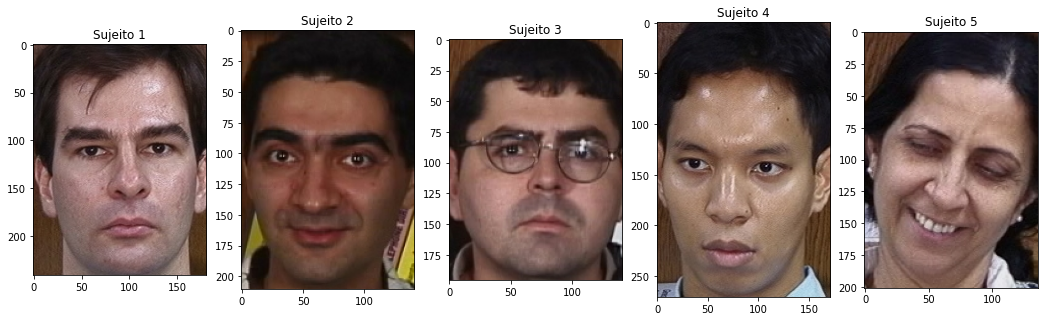

In [ ]:
# Verificando as Imagens
imagem_face_1 = cv2.imread("imagens/cropped_faces/s01_01.jpg")
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread("imagens/cropped_faces/s02_01.jpg")
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread("imagens/cropped_faces/s03_01.jpg")
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2RGB)

imagem_face_4 = cv2.imread("imagens/cropped_faces/s04_01.jpg")
imagem_face_4 = cv2.cvtColor(imagem_face_4, cv2.COLOR_BGR2RGB)

imagem_face_5 = cv2.imread("imagens/cropped_faces/s05_01.jpg")
imagem_face_5 = cv2.cvtColor(imagem_face_5, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(18,10))

plt.subplot(151)
plt.title("Sujeito 1")
plt.imshow(imagem_face_1)

plt.subplot(152)
plt.title("Sujeito 2")
plt.imshow(imagem_face_2)

plt.subplot(153)
plt.title("Sujeito 3")
plt.imshow(imagem_face_3)

plt.subplot(154)
plt.title("Sujeito 4")
plt.imshow(imagem_face_4)

plt.subplot(155)
plt.title("Sujeito 5")
plt.imshow(imagem_face_5)

plt.show()

In [ ]:
faces_caminho = "imagens/cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho)
if isfile(join(faces_caminho,f))]

In [ ]:
lista_arq_faces[0]

's43_14.jpg'

In [ ]:
len(lista_arq_faces)

750

In [ ]:
faces_path_treino = "imagens/treino/"
faces_path_teste = "imagens/teste/"

if not path.exists(faces_path_treino):
  makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
  makedirs(faces_path_teste)

for arq in lista_arq_faces:
  sujeito = arq[1:3]
  numero = arq[4:6]

  if int(numero) <= 10:
    shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
  else:
    shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

In [ ]:
def padronizar_imagem(imagem_caminho):
  imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
  imagem = cv2.resize(imagem, (200,200), interpolation=cv2.INTER_LANCZOS4)
  return imagem

In [ ]:
lista_faces_treino = [f for f in listdir(faces_path_treino)
if isfile(join(faces_path_treino,f))]

lista_faces_teste = [f for f in listdir(faces_path_teste)
if isfile(join(faces_path_teste,f))]

In [ ]:
lista_faces_treino[2]

's07_10.jpg'

In [ ]:
lista_faces_teste[0]

's43_14.jpg'

In [ ]:
dados_treinamento, sujeitos = [],[]

In [ ]:
# Percorrer as imagens carregadas
for i, arq in enumerate(lista_faces_treino):
  imagem_path = faces_path_treino + arq
  imagem = padronizar_imagem(imagem_path)
  dados_treinamento.append(imagem)
  sujeito = arq[1:3]
  sujeitos.append(int(sujeito))

In [ ]:
len(dados_treinamento)

500

In [ ]:
dados_teste, sujeitos_teste = [],[]

In [ ]:
# Percorrer as imagens carregadas
for i, arq in enumerate(lista_faces_teste):
  imagem_path = faces_path_teste + arq
  imagem = padronizar_imagem(imagem_path)
  dados_teste.append(imagem)
  sujeito = arq[1:3]
  sujeitos_teste.append(int(sujeito))

In [ ]:
len(dados_teste)

250

In [ ]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

In [ ]:
# Criação do classificador
modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()

In [ ]:
modelo_eingenfaces.train(dados_treinamento, sujeitos)

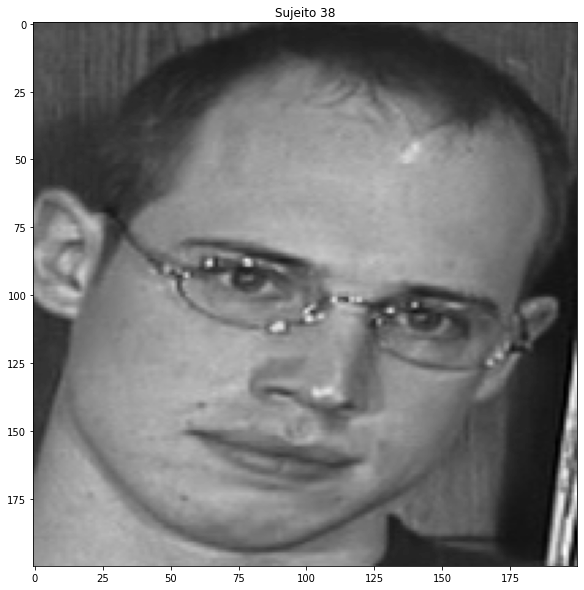

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Sujeito " + str(sujeitos_teste[1]))
plt.imshow(dados_teste[1], cmap="gray")
plt.show()

In [ ]:
predicao = modelo_eingenfaces.predict(dados_teste[1])
predicao

(38, 7068.515813162123)